### Part 1: Build the model in TensorFlow 1

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
import numpy as np
from sklearn.utils import shuffle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
df=pd.read_csv('./datasets/boston.csv',header=0)
df=np.array(df)

In [3]:
for i in range(12):
    df[:,i]=(df[:,i]-df[:,i].min())/(df[:,i].max()-df[:,i].min())
x_data=df[:,:12]
y_data=df[:,12]
x=tf.placeholder(tf.float32,[None,12])
y=tf.placeholder(tf.float32,[None,1])

w=tf.Variable(tf.random_normal([12,1],stddev=0.01))
b=tf.Variable(1.0)

In [4]:
def model(x,w,b):
    return tf.matmul(x,w)+b
def loss(x,y,w,b):
    err=y-model(x,w,b)
    return tf.reduce_mean(tf.pow(err,2))

In [5]:
learning_rate=0.01
loss_function=loss(x,y,w,b)
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

training_epochs=5
for epoch in range(training_epochs):
    loss_sum=0.0
    for xs,ys in zip(x_data,y_data):
        xs=xs.reshape(1,12)
        ys=ys.reshape(1,1)
        _,loss=sess.run([optimizer,loss_function],feed_dict={x:xs,y:ys})
        loss_sum=loss_sum+loss

    xvalues,yvalues=shuffle(x_data,y_data)
    b0temp=b.eval(session=sess)
    w0temp=w.eval(session=sess)
    loss_average=loss_sum/len(y_data)
    print('epoch:',epoch+1,',loss=',loss_average,',b=',b0temp,',w=',w0temp)

epoch: 1 ,loss= 60.67955696259656 ,b= 10.969132 ,w= [[-0.83357614]
 [ 2.943863  ]
 [ 0.02500099]
 [ 0.76805943]
 [ 1.4604896 ]
 [ 9.70935   ]
 [ 2.8743038 ]
 [ 3.0673215 ]
 [ 0.59216416]
 [ 0.19549869]
 [ 1.2586415 ]
 [-3.8896182 ]]
epoch: 2 ,loss= 37.050590273173796 ,b= 12.917881 ,w= [[-1.5448714 ]
 [ 3.5313962 ]
 [-0.5231137 ]
 [ 1.4340372 ]
 [ 1.6537327 ]
 [13.807234  ]
 [ 2.193652  ]
 [ 2.5407455 ]
 [ 0.87947   ]
 [-0.42211586]
 [-0.61113274]
 [-8.0124235 ]]
epoch: 3 ,loss= 30.57879842962434 ,b= 14.163875 ,w= [[ -2.1624343]
 [  3.444942 ]
 [ -0.7223132]
 [  1.8402184]
 [  1.8130006]
 [ 16.582392 ]
 [  1.8140193]
 [  1.6560522]
 [  1.3135657]
 [ -0.8464562]
 [ -1.8928767]
 [-11.082884 ]]
epoch: 4 ,loss= 27.300993336820223 ,b= 15.069633 ,w= [[ -2.716438 ]
 [  3.15404  ]
 [ -0.7777459]
 [  2.0301495]
 [  1.8554265]
 [ 18.533855 ]
 [  1.546633 ]
 [  0.7289388]
 [  1.7665159]
 [ -1.1714667]
 [ -2.7758417]
 [-13.415102 ]]
epoch: 5 ,loss= 25.48113357220062 ,b= 15.788662 ,w= [[ -3.2233984 

### Part 2: Build the same model but in TensorFlow 2

In [ ]:
import sys
sys.exit("The previous part of code finished execution. To run the following code, please 'Restart' and 'Run All' manually.")

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import scale
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
df=pd.read_csv('./datasets/boston.csv',header=0)
df=df.values

In [3]:
x_data=df[:,:12]
y_data=df[:,12]
x_train=tf.cast(scale(x_data[:300]),dtype=tf.float32)
y_train=y_data[:300]
x_vaild=tf.cast(scale(x_data[300:400]),dtype=tf.float32)
y_vaild=y_data[300:400]
x_test=tf.cast(scale(x_data[400:len(x_data)]),dtype=tf.float32)
y_test=y_data[400:len(y_data)]

w=tf.Variable(tf.random.normal([12,1],mean=0.0,stddev=1.0,dtype=tf.float32))
b=tf.Variable(tf.zeros(1),dtype=tf.float32)

In [4]:
def model(x,w,b):
    return tf.matmul(x,w)+b
def loss_function(x,y,w,b):
    err=model(x,w,b)-y
    return tf.reduce_mean(tf.square(err))
def grad(x,y,w,b):
    with tf.GradientTape() as tape:
        return tape.gradient(loss_function(x,y,w,b),[w,b])

In [5]:
learning_rate=0.01
optimizer=tf.keras.optimizers.SGD(learning_rate)

loss_list_train=[]
loss_list_vaild=[]

training_epochs=5
batch_size=10
total_step=int(300/batch_size)
for epoch in range(training_epochs):
    for step in range(total_step):
        xs=x_train[step*batch_size:(step+1)*batch_size,:]
        ys=y_train[step*batch_size:(step+1)*batch_size]
        grads=grad(xs,ys,w,b)
        optimizer.apply_gradients(zip(grads,[w,b]))

    loss_list_train.append(loss_function(x_train,y_train,w,b).numpy())
    loss_list_vaild.append(loss_function(x_vaild,y_vaild,w,b).numpy())
    print('epoch:{:03d}, train loss={:.4f}, vaild loss=:{:.4f}'.format(epoch+1,loss_function(x_train,y_train,w,b),loss_function(x_vaild,y_vaild,w,b)))

epoch:001, train loss=296.7859, vaild loss=:216.4565
epoch:002, train loss=160.6357, vaild loss=:132.9727
epoch:003, train loss=121.3695, vaild loss=:121.6641
epoch:004, train loss=109.5956, vaild loss=:125.0500
epoch:005, train loss=105.8354, vaild loss=:129.4877


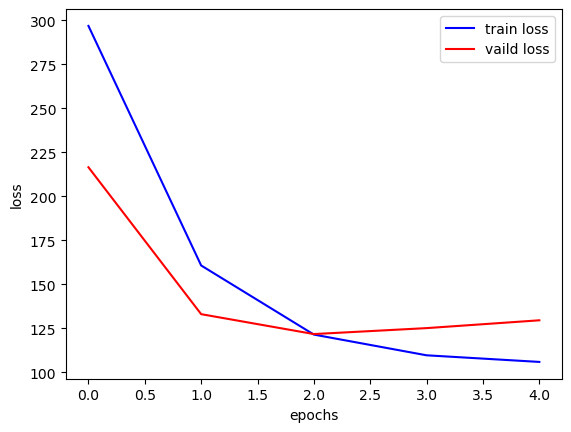

In [6]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(loss_list_train,'blue',label='train loss')
plt.plot(loss_list_vaild,'red',label='vaild loss')
plt.legend(loc=1)